## Linear-Regression

During your studies you may have learned linear regression already.

In [1]:
https://github.com/donnemartin/data-science-ipython-notebooks/blob/master/scikit-learn/scikit-learn-linear-reg.ipynb

SyntaxError: invalid syntax (<ipython-input-1-48e0293d0ea3>, line 1)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
import pylab as pl

seaborn.set()

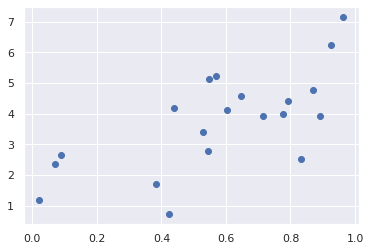

In [3]:
# Create some simple data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

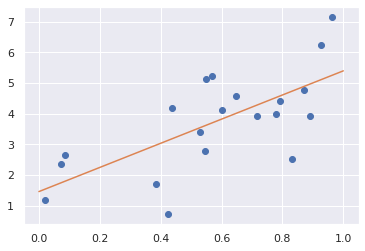

In [4]:
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

## Weatherbench Timeseries

## A Earth System Data Example (e.g., Weatherbench, ...)?

Xarray + PyTorch --> keep a few unoptimized parts, for which we could dive deep in the pre-processing course.

Regression: Could extract a timeseries to fit a curve, while also not needing to much data (and thus have quick training turnaround times to just so barely showcase some predictive skill)

In [13]:
# require some additional software
!pip install xarray
!pip install netCDF4
!pip install dask        # somehow necessary but not automatically installed for xarray + netcdf4

You should consider upgrading via the '/home/pq/AIM/training/Hands-On ML Bootstrap/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/pq/AIM/training/Hands-On ML Bootstrap/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/pq/AIM/training/Hands-On ML Bootstrap/venv/bin/python3 -m pip install --upgrade pip' command.


In [14]:
# set symlink to data when on mistral
#!ln -s /mnt/lustre01/work/ka1176/jakob/2020-04-hzg-dynamic-data-loader/data/shared/weatherbench/ ./data/weatherbench

In [15]:
import xarray as xr

In [49]:
data_root = "./data"
paths = [
    f"{data_root}/weatherbench/5.625deg/temperature/temperature_1986_5.625deg.nc",
    f"{data_root}/weatherbench/5.625deg/total_precipitation/total_precipitation_1986_5.625deg.nc"
    # ..., whatever remains feasible for short enough computations
]

wb = xarray.open_mfdataset(paths)
wb.load()
wb

<xarray.Dataset>
Dimensions:  (lat: 32, level: 13, lon: 64, time: 8760)
Coordinates:
  * level    (level) int32 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * time     (time) datetime64[ns] 1986-01-01 ... 1986-12-31T23:00:00
Data variables:
    t        (time, level, lat, lon) float32 dask.array<open_dataset-7be5a780...
    tp       (time, lat, lon) float32 dask.array<open_dataset-09a2f955e7f02cd...
Attributes:
    Conventions:  CF-1.6
    history:      2020-03-03 18:44:54 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

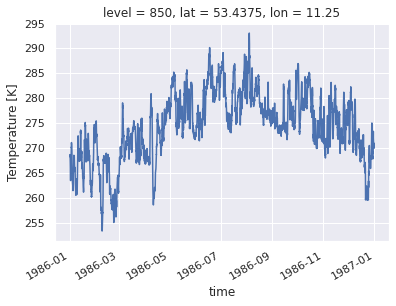

In [55]:
# best matching lon, lat for hamburg
lat = 53.4375
lon = 11.25

ham = wb.sel(lat=lat, lon=lon, level=850)
ham.t.plot()